In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# Selling price is the dependent

In [6]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [7]:
# Check Missing or Null Values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Removed Car_name column since its not so important
final_df = df.iloc[:,1:]

In [10]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_df['current_yr'] = 2020

In [12]:
final_df['age'] = final_df['current_yr'] - final_df['Year']

In [13]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_yr,age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
# Dropping Year and Current_yr
final_df.drop(['Year','current_yr'],axis=1,inplace=True)

In [15]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
# One Hot Encoding
final_df = pd.get_dummies(final_df,drop_first=True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

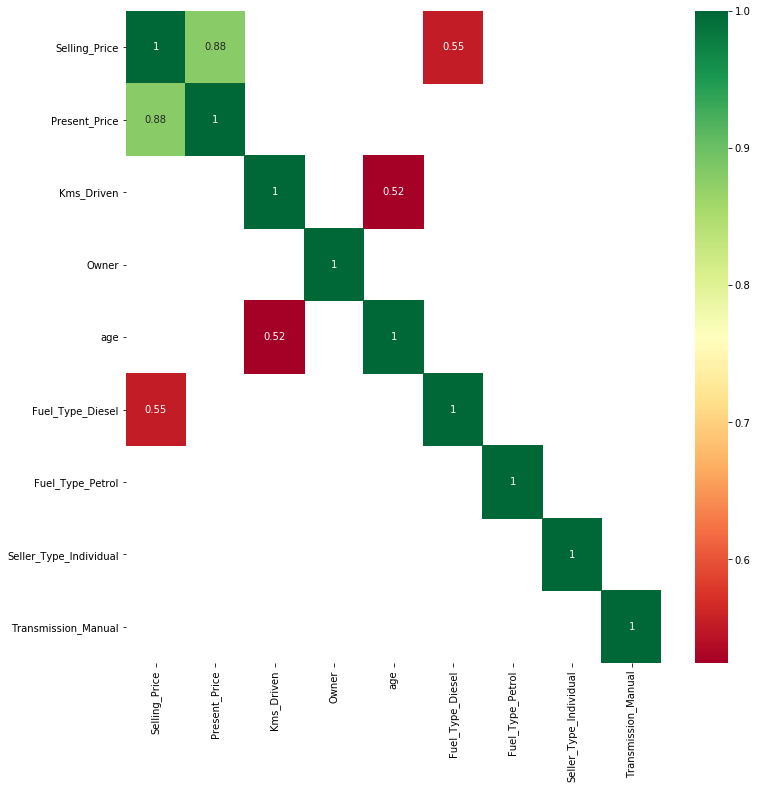

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(final_df.corr()[final_df.corr()>0.5],annot=True,cmap='RdYlGn')

In [20]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
# since here in this dataset , we don't have many features and data, we won't drop any features 

In [24]:
# Feature Importance when features are more
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [26]:
print(model.feature_importances_)

[0.36373988 0.03937572 0.0008625  0.07736958 0.23711338 0.00956411
 0.12463825 0.14733658]


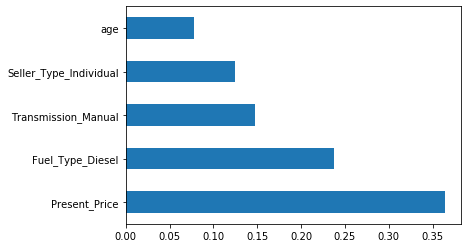

In [27]:
# Decoration 
feat_imp = pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(240, 8)

In [30]:
X_test.shape

(61, 8)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
import numpy as np

In [32]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [33]:
max_feat = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split = [2,5,10,15,100]
min_sample_leaf = [1,2,5,10]

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_feat,
               'max_depth' : max_depth,
               'min_samples_split' : min_sample_split,
               'min_samples_leaf' : min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
rf_random = RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [38]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [39]:
pred = rf_random.predict(X_test)

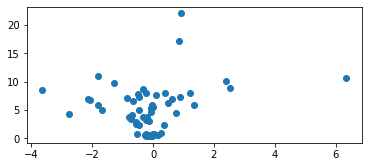

In [40]:
resid = y_test - pred
# Residual vs Predicted Plot - this should not have any pattern
fig,ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(resid,pred)

In [41]:
# So Residual/error and predicted values have no trend which confirms the linearity assumption of model
# If the residual or error have a cone shape with increasing variance in one direction , it represnts heteroscedacity


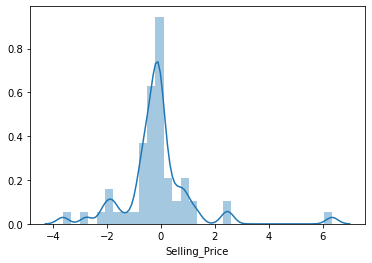

In [42]:
# Normality of Residual
sns.distplot(resid) 

In [43]:
# so the residual is normally distributed which also confirms the linear assumption of LR

In [44]:
# Probability plot 
from scipy.stats import probplot

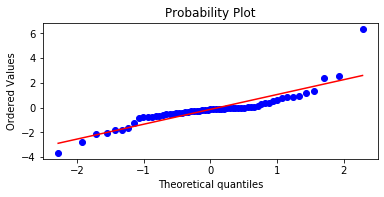

In [45]:
fig,ax = plt.subplots(figsize=(6,2.5))
a,(_,_,r) = probplot(resid,plot=ax,fit=True)

In [46]:
# This shows the deviation of linear model from actual linear model
# r is sqrt of R square

In [47]:
# Multicollinearity Check
X_train.corr()

,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Present_Price,1.000000,0.223389,0.032859,0.053074,0.493976,-0.493976,-0.494452,-0.336689
Kms_Driven,0.223389,1.000000,0.111943,0.498288,0.204357,-0.204357,-0.127436,-0.188258
Owner,0.032859,0.111943,1.000000,0.195646,-0.046223,0.046223,0.097842,-0.074833
age,0.053074,0.498288,0.195646,1.000000,-0.006022,0.006022,0.021364,0.037823
Fuel_Type_Diesel,0.493976,0.204357,-0.046223,-0.006022,1.000000,-1.000000,-0.353694,-0.123007
Fuel_Type_Petrol,-0.493976,-0.204357,0.046223,0.006022,-1.000000,1.000000,0.353694,0.123007
Seller_Type_Individual,-0.494452,-0.127436,0.097842,0.021364,-0.353694,0.353694,1.000000,0.035234
Transmission_Manual,-0.336689,-0.188258,-0.074833,0.037823,-0.123007,0.123007,0.035234,1.000000


In [48]:
# If any correlation coefficient crosses 0.8 , MC exists so we can drop one of the features

In [49]:
import pickle

In [50]:
file = open('rf_carset.pkl','wb')
pickle.dump(rf_random,file)